In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Library for handling imbalanced dataset
from imblearn.over_sampling import SMOTE

# Feature Selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Evaluation metrics 
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score

from sklearn.model_selection import train_test_split

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('Healthcare_cat_dataset.csv')
df

,group,ID,outcome,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,cal_cat,chloride_cat,anion_cat,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat
0,1,125047,0.0,72,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,1
1,1,139812,0.0,75,2,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,1
2,1,109787,0.0,83,2,1,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
3,1,130587,0.0,43,2,0,0,0,0,0,...,1,0,1,1,1,0,0,0,0,1
4,1,138290,0.0,75,2,0,1,0,0,0,...,1,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,1,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1173,2,101659,0.0,78,1,1,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
1174,2,162069,0.0,85,2,1,1,1,0,1,...,0,1,1,1,0,1,0,1,0,1
1175,2,120967,0.0,79,2,0,0,0,1,1,...,0,1,1,1,0,1,0,1,0,0


In [3]:
df.head(5)

,group,ID,outcome,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,cal_cat,chloride_cat,anion_cat,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat
0,1,125047,0.0,72,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,1
1,1,139812,0.0,75,2,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,1
2,1,109787,0.0,83,2,1,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
3,1,130587,0.0,43,2,0,0,0,0,0,...,1,0,1,1,1,0,0,0,0,1
4,1,138290,0.0,75,2,0,1,0,0,0,...,1,1,1,0,1,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   group               1177 non-null   int64  
 1   ID                  1177 non-null   int64  
 2   outcome             1176 non-null   float64
 3   age                 1177 non-null   int64  
 4   gendera             1177 non-null   int64  
 5   BMI_cat             1177 non-null   int64  
 6   hypertensive        1177 non-null   int64  
 7   atrialfibrillation  1177 non-null   int64  
 8   CHD with no MI      1177 non-null   int64  
 9   diabetes            1177 non-null   int64  
 10  deficiencyanemias   1177 non-null   int64  
 11  depression          1177 non-null   int64  
 12  Hyperlipemia        1177 non-null   int64  
 13  Renal failure       1177 non-null   int64  
 14  COPD                1177 non-null   int64  
 15  heart rate at       1177 non-null   int64  
 16  Pulse 

### Handling Missing values

In [5]:
# Pulse rate cat feature is having datatype as object, hence check the unique values in this feature.
df["Pulse rate cat"].unique()

array(['1', '0', '#VALUE!'], dtype=object)

In [6]:
df['Pulse rate cat'].value_counts()

1          775
0          386
#VALUE!     16
Name: Pulse rate cat, dtype: int64

In [7]:
mode_value = df['Pulse rate cat'].mode()[0]
df['Pulse rate cat'].replace({'#VALUE!':'1'},inplace=True)

In [8]:
df['Pulse rate cat'].value_counts()

1    791
0    386
Name: Pulse rate cat, dtype: int64

In [9]:
df['Pulse rate cat'] = df['Pulse rate cat'].astype(int)

In [10]:
df.isnull().sum()

group                 0
ID                    0
outcome               1
age                   0
gendera               0
BMI_cat               0
hypertensive          0
atrialfibrillation    0
CHD with no MI        0
diabetes              0
deficiencyanemias     0
depression            0
Hyperlipemia          0
Renal failure         0
COPD                  0
heart rate at         0
Pulse rate cat        0
Sys_cat               0
Diastolic             0
respiratory cat       0
temp_cat              0
SP O2                 0
urine_cat             0
hemocrit_cat          0
RBC_Cat               0
mch_cat               0
mchc_Cat              0
mcv_cta               0
rdw_cat               0
leukocytes_cat        0
platelets_cat         0
neutriphil_cat        0
Basophil_cat          0
Lympho_cat            0
PT_cat(sec)           0
INR_cat               0
NT_cat                0
CK_cat                0
Creatinine_cat        0
UN_cat                0
Glu_cat               0
potas_cat       

In [11]:
#Outcome feature is having only 1 null value.
df.outcome.unique()

array([ 0.,  1., nan])

In [12]:
mode_val = df['outcome'].mode()[0]
mode_val

0.0

In [13]:
df['outcome'].fillna(mode_val, inplace=True)

In [14]:
df['outcome'].value_counts()

0.0    1018
1.0     159
Name: outcome, dtype: int64

In [15]:
df['outcome'] = df['outcome'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   group               1177 non-null   int64
 1   ID                  1177 non-null   int64
 2   outcome             1177 non-null   int32
 3   age                 1177 non-null   int64
 4   gendera             1177 non-null   int64
 5   BMI_cat             1177 non-null   int64
 6   hypertensive        1177 non-null   int64
 7   atrialfibrillation  1177 non-null   int64
 8   CHD with no MI      1177 non-null   int64
 9   diabetes            1177 non-null   int64
 10  deficiencyanemias   1177 non-null   int64
 11  depression          1177 non-null   int64
 12  Hyperlipemia        1177 non-null   int64
 13  Renal failure       1177 non-null   int64
 14  COPD                1177 non-null   int64
 15  heart rate at       1177 non-null   int64
 16  Pulse rate cat      1177 non-null   int32


# Feature Engineering

In [17]:
# Combining Hypertensive, Systolic BP and Diastolic BP feature into single feature BP -
"""df['BP'] = np.where((df['Sys_cat'] == 1) & (df['Diastolic'] == 1), 1,
                   np.where((df['Sys_cat'] == 0) & (df['Diastolic'] == 0), 0, 2))"""
df['BP'] = (df['Sys_cat'] + df['Diastolic'])/2 # include ony sys and dia

In [18]:
df['BP'].unique()

array([1. , 0. , 0.5])

In [19]:
df['BP'].value_counts()

0.5    930
1.0    167
0.0     80
Name: BP, dtype: int64

In [20]:
# MCH, MCV, MCHC, RDW these values represents physical feature of RBCs - physical_features_of_RBC
df['physical_features_of_RBC'] = df['mch_cat']+df['mchc_Cat']+df['mcv_cta']+df['rdw_cat']
df['physical_features_of_RBC'].value_counts()

3    473
2    291
4    228
1    123
0     62
Name: physical_features_of_RBC, dtype: int64

In [21]:
# Neutrophils, Lymphocytes, Basophils, leukocytes these readings are present while checking WBCs, hence combining 
# them into single feature - WBC_counts
#df['WBC_counts'] = (df['Basophil_cat'] << 2) | (df['neutriphil_cat'] << 1) | df['Lympho_cat']-bitwise operator
df['WBC_counts'] = (df['Basophil_cat'] + df['neutriphil_cat'] + df['Lympho_cat']+df['leukocytes_cat'])
df['WBC_counts'].value_counts()

1    426
2    384
0    194
3    167
4      6
Name: WBC_counts, dtype: int64

In [22]:
# RBC, platelets, Hematocrit, all these readings are present in CBP report, hence combining 
# them into single feature - CBC_count
df['CBC_count'] = (df['RBC_Cat']+df['hemocrit_cat']+df['platelets_cat'])
df['CBC_count'].value_counts()

1    551
2    257
3    192
0    177
Name: CBC_count, dtype: int64

In [23]:
# Atrial fibrillation, CHD with no MI, Renal Failure, COPD these are the high risk disease and can be 
# combined into single feature - High_Risk_Disease 
df['High_Risk_Disease'] = (df['Renal failure']+df['CHD with no MI']+df['atrialfibrillation']+df['COPD'])
df['High_Risk_Disease'].value_counts()

1    527
0    352
2    271
3     26
4      1
Name: High_Risk_Disease, dtype: int64

In [24]:
df.describe()

,group,ID,outcome,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat,BP,physical_features_of_RBC,WBC_counts,CBC_count,High_Risk_Disease
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,1.299065,150778.120646,0.135089,74.055225,1.525064,0.445200,0.717927,0.451147,0.085811,0.421410,...,0.532710,0.029737,0.213254,0.283772,0.570093,0.536958,2.579439,1.460493,1.394223,0.977910
std,0.458043,29034.669513,0.341964,13.434061,0.499584,0.497199,0.450200,0.497819,0.280204,0.493995,...,0.499141,0.169932,0.409780,0.451019,0.495273,0.226145,1.075715,0.945097,0.930895,0.790798
min,1.000000,100213.000000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,2.000000,1.000000,1.000000,0.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.500000,3.000000,1.000000,1.000000,1.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.500000,3.000000,2.000000,2.000000,2.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.000000


In [25]:
X = df.drop(['outcome'], axis = 1)
y = df['outcome']

## Treating imbalanced dataset

In [26]:
# Check for imbalanced dataset -

class_counts = df['outcome'].value_counts()
minority_class_count = class_counts.min()
majority_class_count = class_counts.max()
imbalance_ratio = majority_class_count / minority_class_count
print("majority_class_count", majority_class_count)
print("minority_class_count", minority_class_count)
print(imbalance_ratio)

majority_class_count 1018
minority_class_count 159
6.40251572327044


In [27]:
# To handle the imbalanced dataset - 
# Apply Regular SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(X_res.shape)
print(y_res.shape)

(2036, 57)
(2036,)


In [28]:
# Check if the imbalanced issue is solved - 
# If the imbalaned ratio is 1, then the dataset is balanced
class_counts = y_res.value_counts()
minority_class_count = class_counts.min()
majority_class_count = class_counts.max()
imbalance_ratio = majority_class_count / minority_class_count
print("majority_class_count", majority_class_count)
print("minority_class_count", minority_class_count)
print(imbalance_ratio)

majority_class_count 1018
minority_class_count 1018
1.0


In [29]:
X_res

,group,ID,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat,BP,physical_features_of_RBC,WBC_counts,CBC_count,High_Risk_Disease
0,1,125047,72,1,0,0,0,0,1,1,...,0,0,0,1,1,1.000000,2,2,1,1
1,1,139812,75,2,0,0,0,0,0,1,...,0,0,0,0,1,1.000000,2,0,1,1
2,1,109787,83,2,1,0,0,0,0,1,...,0,0,0,0,0,1.000000,0,3,1,1
3,1,130587,43,2,0,0,0,0,0,0,...,0,0,0,0,1,0.000000,1,3,3,0
4,1,138290,75,2,0,1,0,0,0,1,...,0,0,0,0,1,1.000000,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,2,175688,89,2,0,1,0,0,0,0,...,0,0,0,0,0,1.000000,0,1,1,0
2032,1,139047,80,1,0,1,1,0,0,0,...,0,0,0,0,0,0.500000,4,0,1,1
2033,1,117026,76,1,0,0,0,0,0,0,...,0,0,0,0,0,1.000000,1,1,1,0
2034,1,160329,84,1,0,1,0,0,0,0,...,0,0,0,0,0,0.500000,3,0,0,0


In [30]:
y_res

0       0
1       0
2       0
3       0
4       0
       ..
2031    1
2032    1
2033    1
2034    1
2035    1
Name: outcome, Length: 2036, dtype: int32

# Multicollinearity test

In [31]:
def correlation_with_target(data, t_col):
    independent_variable = data.drop(t_col, axis = 1).columns
    corr_result = []
    for col in independent_variable:
        corr_result.append(data[t_col].corr(data[col]))
        print(data[t_col].corr(data[col]))
    result = pd.DataFrame([independent_variable, corr_result], index=['Independent Variables', 'Correlation']).T
    return result

In [32]:
correlation_with_target(df, 'outcome')

-0.024708756481534883
0.040259100384109674
0.06427003628872001
-0.02232436267659229
-0.003934742365469501
-0.07263484177829953
0.10123797512688633
-0.014589543244796579
-0.05035864898965561
-0.09924376584350801
-0.06075244427672227
-0.053185123124077964
-0.10885598068389978
-0.04722288578328541
-0.053185025395491296
-0.06806334455597618
-0.10792590211355414
0.0855737741924263
-0.10717789708534552
-0.07566042501723784
-0.0401800818127552
0.06541706114189193
0.0024234231475067825
-0.029223606050094414
-0.04999494190598042
-0.021397817152033212
-0.07103155132572152
-0.13381686833843467
-0.18038059148897104
-0.11354169381218647
-0.08222287140309964
0.09079276427165318
-0.17349018751570372
-0.07019072139530247
-0.027120749307548434
-0.03582627999879757
0.005354188165004676
-0.07947344026975146
-0.13214058005370344
0.05306452374773336
-0.06285683379866232
-0.12292837839244715
-0.12634164562904343
-0.09188787119104665
-0.21920652071298347
-0.052179948241975
0.13660793571830387
-0.058292065967

,Independent Variables,Correlation
0,group,-0.024709
1,ID,0.040259
2,age,0.06427
3,gendera,-0.022324
4,BMI_cat,-0.003935
5,hypertensive,-0.072635
6,atrialfibrillation,0.101238
7,CHD with no MI,-0.01459
8,diabetes,-0.050359
9,deficiencyanemias,-0.099244


# ANALYSIS

    1) Renal failure, respiratory rate, atrial fibrillation, heart_beat_rate are having 10% correlation with Outcome.
    2) RDW is having 13 % correlation with Outcome.
    3) Leukocytes is having 18% correlation with Outcome.
    4) Platelets is having 11% correlation with Outcome.
    5) Lymphocytes is having 17% correlation with Outcome.
    6) Urea Nitrogen is having 13% correlation with Outcome.
    7) Sodium and Calcium are having 12% correlation with Outcome.
    8) Anion gap is having 21% correlation with Outcome.
    9) pH is having 13% correlation with Outcome.
    10) Metcat is having 26% correlation with Outcome.
    11) WBC_counts is having 16% correlation with Outcome.

In [33]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI_cat', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate at',
       'Pulse rate cat', 'Sys_cat', 'Diastolic', 'respiratory cat', 'temp_cat',
       'SP O2 ', 'urine_cat', 'hemocrit_cat', 'RBC_Cat', 'mch_cat', 'mchc_Cat',
       'mcv_cta', 'rdw_cat', 'leukocytes_cat', 'platelets_cat',
       'neutriphil_cat', 'Basophil_cat', 'Lympho_cat', 'PT_cat(sec)',
       'INR_cat', 'NT_cat', 'CK_cat', 'Creatinine_cat', 'UN_cat', 'Glu_cat',
       'potas_cat', 'sodium_cat', 'cal_cat', 'chloride_cat', 'anion_cat',
       'Mag_cat', 'ph_cat', 'Biccarbon_cat', 'metcat', 'lactic_cat',
       'pco2_cat', 'ef_cat', 'BP', 'physical_features_of_RBC', 'WBC_counts',
       'CBC_count', 'High_Risk_Disease'],
      dtype='object')

## Model Building

In [34]:
y = pd.DataFrame(y_res)
y

,outcome
0,0
1,0
2,0
3,0
4,0
...,...
2031,1
2032,1
2033,1
2034,1


In [35]:
X_res

,group,ID,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat,BP,physical_features_of_RBC,WBC_counts,CBC_count,High_Risk_Disease
0,1,125047,72,1,0,0,0,0,1,1,...,0,0,0,1,1,1.000000,2,2,1,1
1,1,139812,75,2,0,0,0,0,0,1,...,0,0,0,0,1,1.000000,2,0,1,1
2,1,109787,83,2,1,0,0,0,0,1,...,0,0,0,0,0,1.000000,0,3,1,1
3,1,130587,43,2,0,0,0,0,0,0,...,0,0,0,0,1,0.000000,1,3,3,0
4,1,138290,75,2,0,1,0,0,0,1,...,0,0,0,0,1,1.000000,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,2,175688,89,2,0,1,0,0,0,0,...,0,0,0,0,0,1.000000,0,1,1,0
2032,1,139047,80,1,0,1,1,0,0,0,...,0,0,0,0,0,0.500000,4,0,1,1
2033,1,117026,76,1,0,0,0,0,0,0,...,0,0,0,0,0,1.000000,1,1,1,0
2034,1,160329,84,1,0,1,0,0,0,0,...,0,0,0,0,0,0.500000,3,0,0,0


In [36]:
# To convert a pandas DataFrame column to a 1D numpy array
y = y.values.ravel()
y

array([0, 0, 0, ..., 1, 1, 1])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y, test_size=0.2, random_state=100)

In [38]:
def model_builder(model_name, model, data, t_col):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print("Accuracy", accuracy)
    precision = precision_score(y_test, y_pred)
    #print("Precision", precision)
    recall = recall_score(y_test, y_pred)
    #print("Recall", recall)
    f1 = f1_score(y_test, y_pred)
    #print("F1", f1)
    result = [model_name, accuracy, precision, recall, f1]
    
    return result

In [39]:
def multiple_models(data, t_col):
    col_names = ['Model name','Accuracy', 'Precision', 'Recall','F1-Score']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('LogisticRegression',LogisticRegression(), data, t_col)
    result.loc[len(result)] = model_builder('GaussianNB', GaussianNB(), data, t_col)
    result.loc[len(result)] = model_builder('DecisionTree', DecisionTreeClassifier(), data, t_col)
    result.loc[len(result)] = model_builder('SVC',SVC(), data, t_col)
    result.loc[len(result)] = model_builder('KNN', KNeighborsClassifier(), data, t_col)
    result.loc[len(result)] = model_builder('RandomForest', RandomForestClassifier(), data, t_col)
    result.loc[len(result)] = model_builder('AdaBoost',AdaBoostClassifier(), data, t_col)
    result.loc[len(result)] = model_builder('GradientBoost',GradientBoostingClassifier(), data, t_col)
    result.loc[len(result)] = model_builder('XGBoost',xgb.XGBClassifier(), data, t_col)
    
    return result.sort_values('Accuracy', ascending = False)

In [40]:
 multiple_models(X_res, y)

,Model name,Accuracy,Precision,Recall,F1-Score
8,XGBoost,0.943627,0.944162,0.939394,0.941772
5,RandomForest,0.938725,0.948187,0.924242,0.936061
7,GradientBoost,0.919118,0.910448,0.924242,0.917293
6,AdaBoost,0.914216,0.897561,0.929293,0.913151
0,LogisticRegression,0.906863,0.892157,0.919192,0.905473
2,DecisionTree,0.867647,0.830275,0.914141,0.870192
1,GaussianNB,0.801471,0.717472,0.974747,0.826552
4,KNN,0.639706,0.615385,0.686869,0.649165
3,SVC,0.485294,0.476923,0.626263,0.541485


### Feature Selection method

In [41]:
selector = SelectKBest(score_func=mutual_info_classif, k=20)
X_new = selector.fit_transform(X_res, y)

In [42]:
X_new.shape

(2036, 20)

In [43]:
 multiple_models(X_new, y)

,Model name,Accuracy,Precision,Recall,F1-Score
5,RandomForest,0.946078,0.953608,0.934343,0.943878
8,XGBoost,0.943627,0.944162,0.939394,0.941772
7,GradientBoost,0.919118,0.910448,0.924242,0.917293
6,AdaBoost,0.914216,0.897561,0.929293,0.913151
0,LogisticRegression,0.906863,0.892157,0.919192,0.905473
2,DecisionTree,0.857843,0.818182,0.909091,0.861244
1,GaussianNB,0.801471,0.717472,0.974747,0.826552
4,KNN,0.639706,0.615385,0.686869,0.649165
3,SVC,0.485294,0.476923,0.626263,0.541485


Accuracy_ExtraTreesClassifier: 0.9264705882352942
precision_ExtraTreesClassifier: 0.9368932038834952
recall_ExtraTreesClassifier: 0.919047619047619
f1_ExtraTreesClassifier: 0.9278846153846153 

ROC score 0.9730038480038481


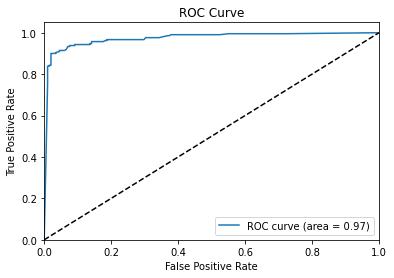

In [54]:
# Fit the Extra Trees Classifier to the full data
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_res, y)

# Create a SelectFromModel object to select the top "k" features
k = 30
sfm = SelectFromModel(model, max_features=k)

# Fit the SelectFromModel object to the full data
sfm.fit(X_res, y)

# Update X to only include the top "k" features
X_k = sfm.transform(X_res)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_k, y, test_size=0.2, random_state=42)

# Fit a new classifier using only the top "k" features
model_ETC = ExtraTreesClassifier(n_estimators=100, random_state=42)
model_ETC.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_ETC.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy_ExtraTreesClassifier:", accuracy)
precision = precision_score(y_test, y_pred)
print("precision_ExtraTreesClassifier:", precision)
recall = recall_score(y_test, y_pred)
print("recall_ExtraTreesClassifier:", recall)
f1 = f1_score(y_test, y_pred)
print("f1_ExtraTreesClassifier:", f1,"\n")

#ROC Curve -
y_scores = model_ETC.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC score",roc_auc)
# Calculate the area under the ROC curve
#roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()




In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Random Forest: 0.928921568627451
Accuracy_RandomForest: 0.928921568627451
precision_RandomForest: 0.9330143540669856
recall_RandomForest: 0.9285714285714286
f1_RandomForest: 0.9307875894988067 

ROC score 0.9778138528138527


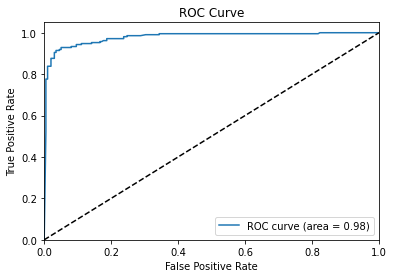

In [56]:
# f1_score, recall_score, precision_score, accuracy_score

# 1) Random Forest Classifier
model_RF = RandomForestClassifier(n_estimators=100)
model_RF = model_RF.fit(X_train, y_train) # Train a classifier on the selected features
y_pred = model_RF.predict(X_test)

# Evaluate the classifier on the test data
score_RF = model_RF.score(X_test, y_test)
print("Random Forest:",score_RF)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy_RandomForest:", accuracy)
precision = precision_score(y_test, y_pred)
print("precision_RandomForest:", precision)
recall = recall_score(y_test, y_pred)
print("recall_RandomForest:", recall)
f1 = f1_score(y_test, y_pred)
print("f1_RandomForest:", f1,"\n")


#ROC Curve -
y_scores = model_RF.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC score",roc_auc)


# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()




XGBoost: 0.9240196078431373
Accuracy_XGBoost: 0.9240196078431373
precision_XGBoost: 0.908675799086758
recall_XGBoost: 0.9476190476190476
f1_XGBoost: 0.9277389277389277 

ROC score 0.9746753246753247


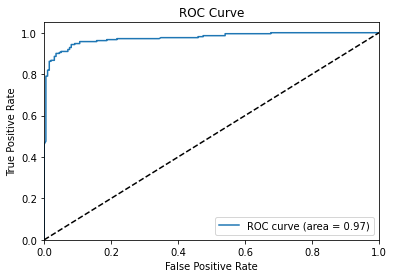

In [57]:
# 2) XGBoost Classifier
model_XGB = xgb.XGBClassifier()
model_XGB = model_XGB.fit(X_train, y_train) 
y_pred = model_XGB.predict(X_test)

score_XGB = model_XGB.score(X_test, y_test)
print("XGBoost:",score_XGB)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy_XGBoost:", accuracy)
precision = precision_score(y_test, y_pred)
print("precision_XGBoost:", precision)
recall = recall_score(y_test, y_pred)
print("recall_XGBoost:", recall)
f1 = f1_score(y_test, y_pred)
print("f1_XGBoost:", f1,"\n")

#ROC Curve -
y_scores = model_XGB.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC score",roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



AdaBoost: 0.9142156862745098
Accuracy_AdaBoost: 0.9142156862745098
precision_AdaBoost: 0.8959276018099548
recall_AdaBoost: 0.9428571428571428
f1_AdaBoost: 0.9187935034802783 

ROC score 0.975925925925926


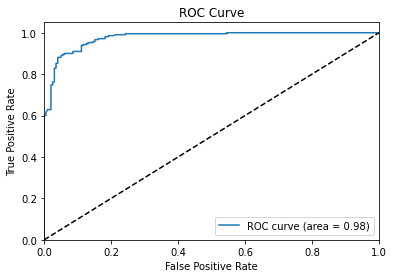

In [55]:
# 3) AdaBoost Classifier
model_ADB = AdaBoostClassifier(n_estimators=100)
model_ADB = model_ADB.fit(X_train, y_train)
y_pred = model_ADB.predict(X_test)

score_ADB = model_ADB.score(X_test, y_test)
print("AdaBoost:",score_ADB)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy_AdaBoost:", accuracy)
precision = precision_score(y_test, y_pred)
print("precision_AdaBoost:", precision)
recall = recall_score(y_test, y_pred)
print("recall_AdaBoost:", recall)
f1 = f1_score(y_test, y_pred)
print("f1_AdaBoost:", f1,"\n")

y_scores = model_ADB.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
print('ROC score', roc_auc)
# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve
#roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Analysis :
    Below are the top 3 Models giving high accuracy value after applying Feature Selection technique : 
    1) RandomForest is giving 92.8% of accuracy
    2) XGBoost is giving 92.4% of accuracy
    3) AdaBoost is giving 91.4% of accuracy

### Chi Square Test to check if the newly created features are passing the hypothesis test or not

In [21]:
# To perform Chi Square Hypothesis Test on newly created features - 
import scipy.stats as stats
from scipy.stats import chi2
dataset_table=pd.crosstab(df['physical_features_of_RBC'],df['outcome'])
print(dataset_table)
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

val=stats.chi2_contingency(dataset_table)
print("val", val)
Expected_Values=val[3]
print("Expected_Values :-\n",Expected_Values)
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
print('no_of_rows', no_of_rows)
print('no_of_columns', no_of_columns)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

outcome                     0   1
physical_features_of_RBC         
0                          48  14
1                         101  22
2                         241  50
3                         420  53
4                         208  20
Observed Values :-
 [[ 48  14]
 [101  22]
 [241  50]
 [420  53]
 [208  20]]
val (16.27185813762648, 0.002675245358996229, 4, array([[ 53.62446899,   8.37553101],
       [106.38402719,  16.61597281],
       [251.68903993,  39.31096007],
       [409.10280374,  63.89719626],
       [197.19966015,  30.80033985]]))
Expected_Values :-
 [[ 53.62446899   8.37553101]
 [106.38402719  16.61597281]
 [251.68903993  39.31096007]
 [409.10280374  63.89719626]
 [197.19966015  30.80033985]]
Degree of Freedom:- 1
no_of_rows 2
no_of_columns 2
chi-square statistic:- 16.27185813762648
critical_value: 3.841458820694124
p-value: 5.48728911622387e-05
Significance level:  0.05
Degree of Freedom:  1
p-value: 5.48728911622387e-05
Reject H0,There is a relationship between 2 catego